# U-Net CARVANA dataset

Let's try the U-Net on a specific dataset: the CARVANA dataset. It is a segmented dataset. Famous dataset for segmentation.

## DATASET

### Setting

It is a dataset of images about cars. It is a segmented dataset: for each image, there is the corresponding segmented image. The ground truth are the segmented images.

Basically, set of pairs $x,y$, where $x$ is an image, and $y$ is the corresponding segmented image (i.e. ground truth).

Two classes: $0$ no car (black); $1$ car (white). Binary segmentation task. Each pixel of the input image is classified as either $0$ or $1$.

This means that, given the input image $x$, the ground truth $y$ has same spatial dimensions of $x$ with only one channels, containing the labels $0/1$. Image with only $0/1$: it is called mask.

Binary segmentation task: given an input image $x$, we want to classify each pixel of the input image as either $0$ (i.e. no car) or $1$ (i.e. car). Basically, given an input image $x$, our prediction $\hat{y}$ consists in a single-channel image containing, for each pixel, the probability of being $1$ (i.e. car). The output of our model is an image with same spatial dimensions of the input image, but only one channel. Predicted segmented image.

Remark: it is important to notice that, in the true segmented images, most of the pixels are $0$/black. Most of the pixels are non-car pixels.

### Download

Carvana dataset. (https://www.kaggle.com/competitions/carvana-image-masking-challenge/overview). We need to download it:

* Login with you kaggle account on https://www.kaggle.com/ .
* Go to the link of the challenge and subscribe to the rules of the challenge.
* In Account, press Create New API Token. This will download a file named $\texttt{kaggle.json}$. 
* Upload this file on the directory C:/.../user_name/.kaggle
* Run the following.

In [2]:
# Install Kaggle library
!pip install kaggle

# Create a new folder .kaggle and move kaggle.json into that
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Allocate permissions for this file
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


Download the dataset.

In [3]:
# Download the data from the competition. If an error occours, either you did
# something wrong on the above or you forgot to subscribe the challenge.
!kaggle competitions download -c carvana-image-masking-challenge

100% 24.4G/24.4G [09:12<00:00, 68.4MB/s]
100% 24.4G/24.4G [09:12<00:00, 47.4MB/s]


In [4]:
# The dataset is huge. For our experiments today, we just need a subset of it.
# Unzip train.zip and the corresponding masks. Not the HQ version.
!unzip -p carvana-image-masking-challenge.zip train.zip >train.zip
!unzip -p carvana-image-masking-challenge.zip train_masks.zip >train_masks.zip

# Unzip the zipped train files.
!unzip train.zip
!unzip train_masks.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_masks/0789bed99cb8_09_mask.gif  
 extracting: train_masks/0789bed99cb8_10_mask.gif  
 extracting: train_masks/0789bed99cb8_11_mask.gif  
 extracting: train_masks/0789bed99cb8_12_mask.gif  
  inflating: train_masks/0789bed99cb8_13_mask.gif  
  inflating: train_masks/0789bed99cb8_14_mask.gif  
  inflating: train_masks/0789bed99cb8_15_mask.gif  
  inflating: train_masks/0789bed99cb8_16_mask.gif  
 extracting: train_masks/0795e132d090_01_mask.gif  
 extracting: train_masks/0795e132d090_02_mask.gif  
 extracting: train_masks/0795e132d090_03_mask.gif  
 extracting: train_masks/0795e132d090_04_mask.gif  
 extracting: train_masks/0795e132d090_05_mask.gif  
 extracting: train_masks/0795e132d090_06_mask.gif  
 extracting: train_masks/0795e132d090_07_mask.gif  
 extracting: train_masks/0795e132d090_08_mask.gif  
 extracting: train_masks/0795e132d090_09_mask.gif  
 extracting: train_masks/0795e132d090_10_mask.gif  
 extracting: 

**Now, there are two folders in our working directory: train and train_masks. The first contains the images, the latter the corresponding segmented images.**

### Loading

In [5]:
# Utilities
import os

# Algebra
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Neural Networks
import tensorflow as tf
from tensorflow import keras as ks

In [19]:
def load_data_from_names(root_dir: str, fnames: list, shape=(256, 256)) -> np.array:
    # Given the root path and a list of file names as input, return the dataset 
    # array.
    images = []
    
    for idx, img_name in enumerate(fnames):
        x = Image.open(os.path.join(root_dir, img_name))
        x = x.resize(shape)
        x = np.array(x)
        images.append(x)

        if idx%100 == 99:
            print(f"Processed {idx+1} images.")
    return np.array(images)

# Load the names
image_names = os.listdir('./train')
mask_names = os.listdir('./train_masks')

image_names.sort()
mask_names.sort()

# To reduce the computational time, we consider only a subset of the dataset
N = 2000 # Number of total datapoints

image_names = image_names[:N]
mask_names = mask_names[:N]

# Create data. We will always use the notation that "x" is the input of the 
# network, "y" is the output.
x = load_data_from_names('./train', image_names)
y = load_data_from_names('./train_masks', mask_names)

# Print the dimension of the dataset.
print(f"The dimension of the dataset is: {x.shape}")

Processed 100 images.
Processed 200 images.
Processed 300 images.
Processed 400 images.
Processed 500 images.
Processed 600 images.
Processed 700 images.
Processed 800 images.
Processed 900 images.
Processed 1000 images.
Processed 1100 images.
Processed 1200 images.
Processed 1300 images.
Processed 1400 images.
Processed 1500 images.
Processed 1600 images.
Processed 1700 images.
Processed 1800 images.
Processed 1900 images.
Processed 2000 images.
Processed 100 images.
Processed 200 images.
Processed 300 images.
Processed 400 images.
Processed 500 images.
Processed 600 images.
Processed 700 images.
Processed 800 images.
Processed 900 images.
Processed 1000 images.
Processed 1100 images.
Processed 1200 images.
Processed 1300 images.
Processed 1400 images.
Processed 1500 images.
Processed 1600 images.
Processed 1700 images.
Processed 1800 images.
Processed 1900 images.
Processed 2000 images.
The dimension of the dataset is: (2000, 256, 256, 3)


**Finally, here there is our dataset!**

In [20]:
# Split the training set into training and test.
TRAIN_SIZE = 1800

x_train = x[:TRAIN_SIZE]
y_train = y[:TRAIN_SIZE]

x_test = x[TRAIN_SIZE:]
y_test = y[TRAIN_SIZE:]

print(f"Train size: {x_train.shape}. Test size: {x_test.shape}")

Train size: (1800, 256, 256, 3). Test size: (200, 256, 256, 3)


### Brief analysis

Training set.

Input images $x_{train}$: $1800$ images, with spatial dimensions $256x256$. They are colored images: $3$ channels.

Target images $y_{train}$: $1800$ images, with spatial dimensions $256x256$ (same spatial dimensions). They have one single channel. They are the segmented images.

The same for the test set, but there are only $200$ images.

Visualization of a couple image-corresponding segmented image.

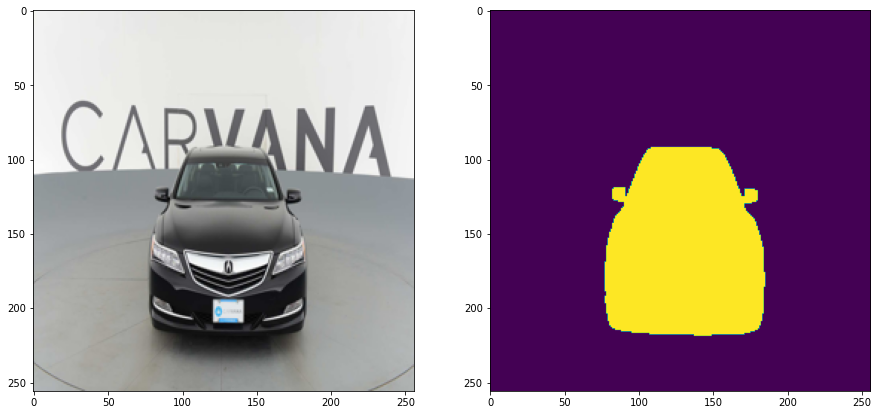

In [21]:
def show(x, y, title=None):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(x)
    if title:
        plt.title(title[0])
    
    plt.subplot(1, 2, 2)
    plt.imshow(y)
    if title:
        plt.title(title[1])

    plt.show()

show(x_train[0], y_train[0])

## FIRST BASIC NN

Let's define a very basic NN for segmentation.

It is a very naive NN for image-to-image transformation. It is a fully Convolutional NN.

We want the output image to have the same spatial dimensions of the input image, but only one channel. The output is a segmented image (i.e. MASK). For each pixel, it contains the probability of being $1$ (i.e. car).

We define a fully Conv NN with the following structure:
- Sequence of Conv layers. We don't decrease the spatial dimensions, we keep the same spatial dimensions. But, at each layer, we double the number of channels.
- In the output layer, we simply apply an unary Conv layer, for keeping the same spatial dimensions while decreasing the number of channels to $1$.

In the output layer, we use the sigmoid activation function. In this way, each pixel/value in the output image is in $[0,1]$, representing a probability of being car.

In [22]:
from tensorflow.keras.layers import Input, Conv2D, ReLU
from tensorflow.keras import Model

In [23]:
# Input
xin = Input(shape=(256, 256, 3))

# Number of channels in each Conv layer
c = 64

# Number of layers
L = 3

x = xin

# Sequence of Conv layers. We don't decrease the spatial dimensions. We double the number of channels.
for i in range(L):
    x = Conv2D(filters=c, kernel_size=3, padding='same')(x)
    x = ReLU()(x)

    # We double the number of channels
    c = 2*c

# Output layer: we produce the segmented image. Only one channels. Sigmoid activation function. Unary Convolution layer
y = Conv2D(filters=1, kernel_size=1, activation='sigmoid')(x)

# Model
basic_nn = ks.Model(xin, y)

In [24]:
basic_nn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 re_lu_3 (ReLU)              (None, 256, 256, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 128)     73856     
                                                                 
 re_lu_4 (ReLU)              (None, 256, 256, 128)     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 256)     295168    
                                                                 
 re_lu_5 (ReLU)              (None, 256, 256, 256)     0   

### Compiling

We use *binary cross-entropy* as loss function. Because binary classification, with the sigmoid.

Basically, for each pixel, we compare our prediction (which is a probability) with the True label $0/1$. Then, we aggregate these errors across all the pixels, for computing the loss of that image.

In [25]:
basic_nn.compile(optimizer=ks.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

### Training

In [26]:
# Set hyperparameters
BATCH_SIZE = 16
N_EPOCHS = 20

# Training
hist = basic_nn.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.1)

Epoch 1/20
102/102 [==============================] - 62s 422ms/step - loss: 0.6082 - accuracy: 0.8438 - val_loss: 0.2875 - val_accuracy: 0.8888
Epoch 2/20
102/102 [==============================] - 41s 406ms/step - loss: 0.3608 - accuracy: 0.8762 - val_loss: 0.2795 - val_accuracy: 0.8925
Epoch 3/20
102/102 [==============================] - 42s 413ms/step - loss: 0.2686 - accuracy: 0.9000 - val_loss: 0.2957 - val_accuracy: 0.8884
Epoch 4/20
102/102 [==============================] - 44s 427ms/step - loss: 0.2586 - accuracy: 0.9076 - val_loss: 0.2421 - val_accuracy: 0.9141
Epoch 5/20
102/102 [==============================] - 43s 422ms/step - loss: 0.2512 - accuracy: 0.9120 - val_loss: 0.2332 - val_accuracy: 0.9205
Epoch 6/20
102/102 [==============================] - 43s 424ms/step - loss: 0.2545 - accuracy: 0.9125 - val_loss: 0.2548 - val_accuracy: 0.9187
Epoch 7/20
102/102 [==============================] - 43s 424ms/step - loss: 0.2380 - accuracy: 0.9180 - val_loss: 0.2554 - val_ac

In [56]:
basic_nn.save_weights('basic_nn.h5')

### Qualitative analysis of the results

We take a test image, we segment it using the NN. We visualize the segmented image.

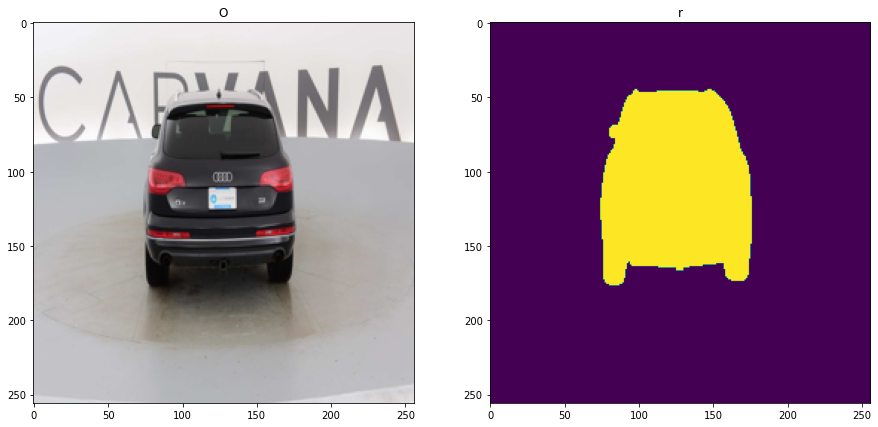

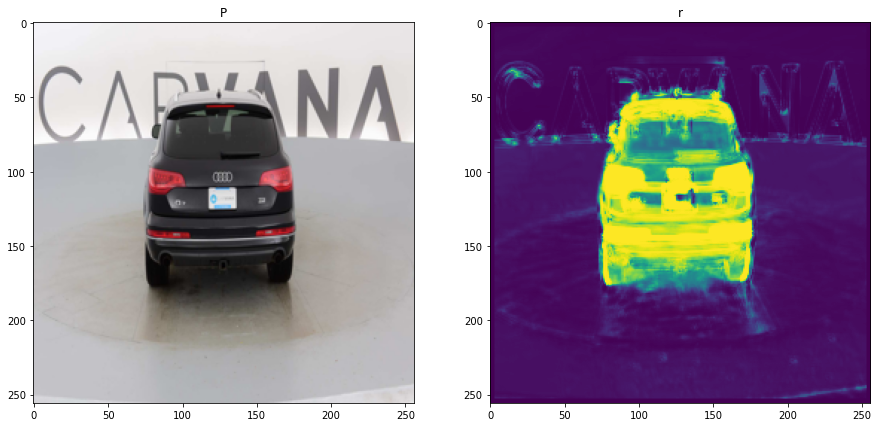

In [27]:
y_pred = basic_nn.predict(x_test[:1])

show(x_test[0, :, :], y_test[0, :, :], title='Original')
show(x_test[0, :, :], y_pred[0, :, :, 0], title='Predicted')

Pretty bad results!!! Pretty bad segmentation of the pixels!!!

### Why the results of this basic NN are so bad?

Because we are not downsampling the image. We are not decreasing the spatial dimensions. 

This means that we are not loosing the spatial information in order to acquire semantic information, for extracting good features.

In other words, the receptive field of each (output) neuron is quite small. We have not enlarged enought the receptive field of the neurons. With a small receptive field, we are not able to detect interesting features and pattern.

### Analysis of the training and of the accuracy

In [30]:
def plot_history(training_history, n_epochs=None):
    if n_epochs is None:
      n_epochs = len(training_history.history['loss'])

    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

    plt.figure()
    plt.plot(epochs, training_history.history['accuracy'], label='train_accuracy')
    plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Accuracy')

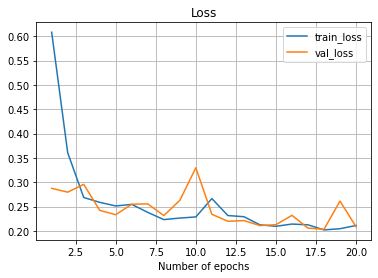

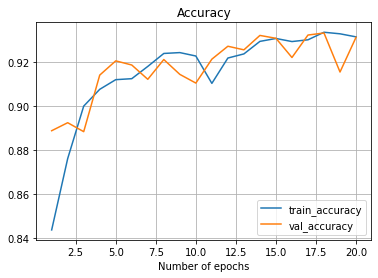

In [31]:
plot_history(hist)

Actually, the accuracy is pretty good. It reaches $0.93$. And no overfitting.

However, the accuracy is not always a reliable measure for segmentation. Expecially if the true segmented images have most of the pixels which are black. Unbalanced classes. Most of the pixels belong to the same class. Like in our case.

## EVALUATION MEASURES FOR SEGMENTATION

How to evaluate the goodness of a segmented image (i.e. predicted mask), with respect to the true segmented mask (i.e. true mask).

There are multiple metrics used to measure the quality of the segmentation. The most important are:

* Accuracy
* Intersection over Union (IoU)
* Dice Coefficient

### Accuracy
We count the number of pixels in the segmented image which are correctly predicted. And we divide by the number of pixels.

It is not a good measure, expecially if we have unbalanced classes. Like in our case: non-car/car are very unbalanced classes.

In this case, a NN which always predicts "Non-car" has a good accuracy. NN which always returns an image/mask with all $0$ has a good accuracy. Even if it is clearly a bas model!

We want metrics to take into account this problem: IOV and Dice coefficient.

### Intersection over Union
The Intersection over Union (IoU) computes the ratio between the area of the intersection between the predicted mask and the ground truth mask, over the area union between the two masks. 

$Area_{intersection}/Area_{union}$

The intersection and the union are defined in the boolean way.
- Intersection: each pixel is $1$ if both pixels of the masks are $1$. It is simply computed as the element-by-element product of the two masks. Then the area of the intersection is the sum of all its elements.
- Union: it is harder to compute. The area of the union is computed with the formula $Area_{union} = Area_{mask1} + Area_{mask2} - Area_{Intersection}$. Where the area of a mask is the sum of all its values.

IoU is a value between $0$ and $1$: $1$ perfect, $0$ completely wrong.

![](https://miro.medium.com/max/300/0*kraYHnYpoJOhaMzq.png)

### Dice coefficient
The Dice coefficient is defined by twice the intersection area of the two masks, over the sum of the area of the two masks.

$2*Area_{intersection}/(Area_{mask1}+Area_{mask2})$

![](https://miro.medium.com/max/429/1*yUd5ckecHjWZf6hGrdlwzA.png)

The intersection area is computed as seen before.

The DIce coefficient is a number between $0$ and $1$: $1$ perfect, $0$ completely wrong.

### Implementing the Iou and the Dice coefficient

In [32]:
from keras import backend as K
from keras.losses import binary_crossentropy

def iou_coeff(y_true, y_pred):
    smooth = 1

    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3]) + K.sum(y_pred,[1,2,3]) - intersection

    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def dice_coeff(y_true, y_pred):
    smooth = 1

    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


### Evaluating our base NN

Let's compute the Iou and the Dice coefficient of our base NN on the test set.

In [33]:
# Predictions on the test set: for each test image x, we compute the predicted
# segmented image y
y_test_pred = basic_nn.predict(x_test) 

In [34]:
 # Adding the channels dimension on the true segmented images, in order to being
 # able to compute the measures
 y_test_1 = np.expand_dims(y_test, -1)

In [35]:
# We force the values to float
y_test_pred = y_test_pred.astype('float32')
y_test_1 = y_test_1.astype('float32')

In [53]:
iou = iou_coeff(y_test_1, y_test_pred)
print(iou)

tf.Tensor(0.60166204, shape=(), dtype=float32)


In [54]:
dice = dice_coeff(y_test_1, y_test_pred)
print(dice)

tf.Tensor(0.75586253, shape=(), dtype=float32)


IoU: $0.6$. Dice coeff: $0.76$. Pretty bad results!!!

Our current NN is pretty bad. We want to improve it.

## UNET

Let's try the U-Net!

### Importance of downsampling

As said several times, downsampling is pretty important. Loosing spatial information enable us to acquire semantic information. In other words, it enables us to enlarge the receptive field.

The basic NN used before did not perform downsampling. Indeed, the results were pretty bad.

Now we use U-Net, which, as we know, performs downsampling. It has a downsampling part and an upsampling part. It is essentially a Convolutional Autoencoder, with skip connections.

The Unet has a huge receptive field. It covers almost the whole input image.

### Defining the U-Net

It is important to notice that in the output layer we use just one filter, since we want to produce just one channel. This because we have only two classes, therefore our segmented output images is a single-channel image containing, for each pixel, the probability of being a car pixel.

In addition, still in the output layer, we use the sigmoid activation function, because we want to produce probabilities.

In [45]:
def build_unet(input_shape, n_ch=32, L=4, conv_per_L=2):
    """ Returns the U-Net model
    
    Arguments
    ---------
    input_shape : tuple of int
        Tuple (w,h,c)
    c0 : int
        Number of channels in the first floor of the network. It is equal to the number of channels in the last floor 
        of the network.
    L : int
        Number of levels, excluded the last one. Basically, number of corresponding pairs of downsampling-upsampling 
        floors.
    conv_per_block : int
        Number of Conv layers in each floor/block. Both downsampling and upsampling floor.
        
    """
    x = ks.layers.Input(shape=input_shape)

    # DOWN
    backup_layers = []
    h = x
    for l in range(L):

        # Each floor in the descent phase
        for c in range(conv_per_L):
            h = ks.layers.Conv2D(n_ch, 3, 1, padding='same')(h)
            h = ks.layers.ReLU()(h)

        if l < L-1: # We don't want to downsample at the last level
            # Downsample
            backup_layers.append(h) # save for the skip connection 
            h = ks.layers.MaxPool2D(padding='same')(h)

            # Update the channels
            n_ch = n_ch * 2
    
    # UP (pay attention to do not double count the last level)
    for l in range(L-1):
        # Reduce the channels
        n_ch = n_ch // 2

        # Upsample
        h = ks.layers.Conv2DTranspose(n_ch, 3, 2, padding='same')(h)

        # Concatenate
        h = ks.layers.concatenate([h, backup_layers.pop(-1)])

        # Each floor in the up phase
        for c in range(conv_per_L):
            h = ks.layers.Conv2D(n_ch, 3, 1, padding='same')(h)
            h = ks.layers.ReLU()(h)
        
    # Output
    # Just one output channel. Sigmoid activation function.
    y = ks.layers.Conv2D(1, 1, activation='sigmoid')(h)
    return ks.models.Model(x, y)

In [46]:
unet = build_unet(input_shape=(256,256,3))

In [47]:
unet.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 256, 256, 32  896         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 re_lu_20 (ReLU)                (None, 256, 256, 32  0           ['conv2d_23[0][0]']              
                                )                                                           

Much bigger NN. $2$ million parameters.

In [48]:
unet.compile(optimizer=ks.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy',
                  metrics=['accuracy'])

In [49]:
# Training
BATCH_SIZE = 16
N_EPOCHS = 20

hist = unet.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS,
              validation_split=0.1)

Epoch 1/20
102/102 [==============================] - 29s 277ms/step - loss: 0.3791 - accuracy: 0.8757 - val_loss: 0.1274 - val_accuracy: 0.9517
Epoch 2/20
102/102 [==============================] - 29s 280ms/step - loss: 0.0877 - accuracy: 0.9663 - val_loss: 0.0750 - val_accuracy: 0.9729
Epoch 3/20
102/102 [==============================] - 29s 283ms/step - loss: 0.0571 - accuracy: 0.9783 - val_loss: 0.0577 - val_accuracy: 0.9785
Epoch 4/20
102/102 [==============================] - 29s 284ms/step - loss: 0.0386 - accuracy: 0.9852 - val_loss: 0.0446 - val_accuracy: 0.9835
Epoch 5/20
102/102 [==============================] - 29s 287ms/step - loss: 0.0280 - accuracy: 0.9893 - val_loss: 0.0405 - val_accuracy: 0.9853
Epoch 6/20
102/102 [==============================] - 29s 288ms/step - loss: 0.0246 - accuracy: 0.9906 - val_loss: 0.0371 - val_accuracy: 0.9864
Epoch 7/20
102/102 [==============================] - 29s 286ms/step - loss: 0.0226 - accuracy: 0.9914 - val_loss: 0.0260 - val_ac

*Even if the NN is much bigger, the training is faster.*

In [52]:
unet.save_weights('unet.h5')

### Qualitative analysis

We take a test image, the same as before, we segment it, and we visualize this segmented image.

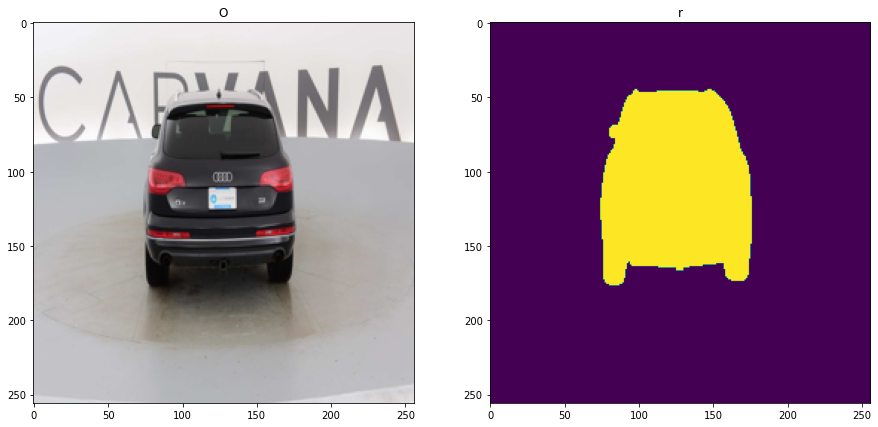

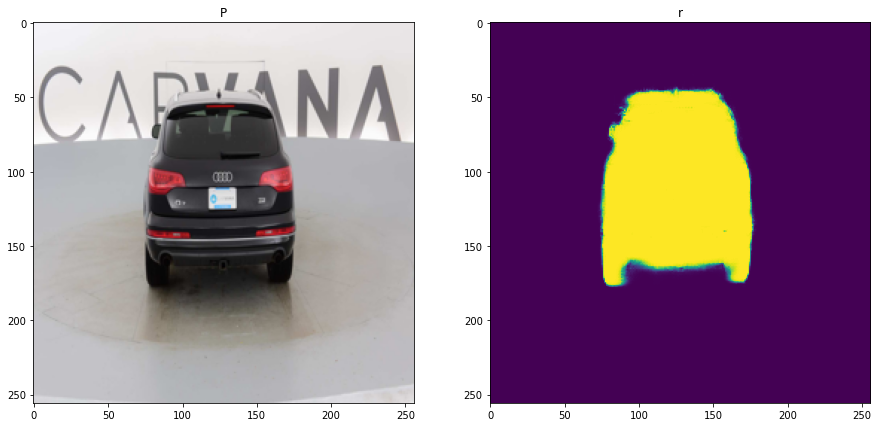

In [51]:
# Qualitative results
y_pred = unet.predict(x_test[:1])

show(x_test[0, :, :], y_test[0, :, :], title='Original')
show(x_test[0, :, :], y_pred[0, :, :, 0], title='Predicted')

**Much better results than before!!! Much better segmentation!!!**

Almost perfect results. Impressive.

### Analysis of the training and of the accuracy

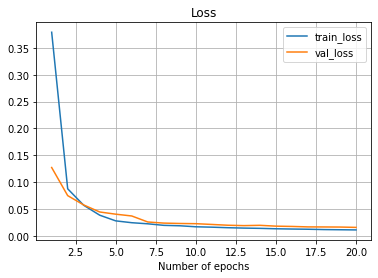

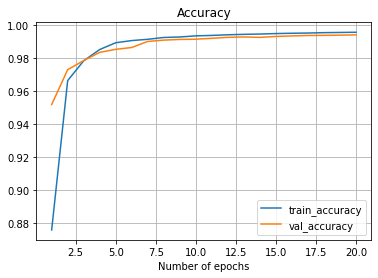

In [50]:
plot_history(hist)

**Almost $1$. Almost perfect accuracy.**

No oscillations. No overfitting. And the accuracy becomes very high with already $2$ epochs. Very fast learning.

### Iou and Dice coefficient

In [62]:
# Predictions on the test set: for each test image x, we compute the predicted
# segmented image y
y_test_pred = unet.predict(x_test) 

In [63]:
 # Adding the channels dimension on the true segmented images, in order to being
 # able to compute the measures
 y_test_1 = np.expand_dims(y_test, -1)

In [64]:
# We force the values to float
y_test_pred = y_test_pred.astype('float32')
y_test_1 = y_test_1.astype('float32')

In [65]:
iou = iou_coeff(y_test_1, y_test_pred)
print(iou)

tf.Tensor(0.9662388, shape=(), dtype=float32)


In [66]:
dice = dice_coeff(y_test_1, y_test_pred)
print(dice)

tf.Tensor(0.98288685, shape=(), dtype=float32)


IoU: $0.97$. Dice coeff: $0.98$. **Much better!**